# Gaussowski Naiwny Klasyfikator Bayesa

In [9]:
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split
import random
import numpy as np
from matplotlib import pyplot as plt
from naive_bayes_classificator import naive_bayes, accuracy_metric
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
plt.style.use('seaborn-whitegrid')

## Implementacja
Implementacja jest schowana w pliku naive_bayes_classificator.py dla przejrzystości notabooka.

In [4]:
def naive_bayesian(X, y, tests, title):
	accuracy = 0
	for i in range(0, tests):
	    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random.randint(0, 100))
	    accuracy += accuracy_metric(naive_bayes(X_train, y_train, X_test, y_test), y_test)
	print("\n==== "+ title + " ====")
	print("Accuracy: " + str(accuracy/tests))
	print("====================")

## Testy na zbiorze Iris
Przetestuj działanie własnej implementacji klasyfikatora dla zbioru danych Iris (4 cechy). Zastosuj losowy podział zbioru danych na część trenignową i testową według proporcji 0.6, 0.4. Powtórz eksperyment 20-krotnie i zmierz średni błąd klasyfikacji i jego odchylenie standardowe.

In [3]:
X, y = load_iris(return_X_y=True)
naive_bayesian(X, y, 100, "Iris")


==== IRIS ====
Accuracy: 95.20000000000002


## Testy na zbiorze Wine
Przeszedłem do testów na nowym zbiorze o większej liczbie cech

### Bez skalowania cech
Pierwsza wersja testu odbywa się na niezmodyfikowanych danych

In [5]:
X, y = load_wine(return_X_y=True)
naive_bayesian(X, y, 100, "Wine STANDARD")


==== IRIS ====
Accuracy: 97.15277777777789


### Z standardowym skalowaniem cech
Zastosowanie skalowania cech (średnia 0, odchylenie 1)

In [8]:
X, y = load_wine(return_X_y=True)
X_scalar = StandardScaler().fit_transform(X)
naive_bayesian(X_scalar, y, 100, "Wine SCALAR")


==== IRIS Wine SCALAR====
Accuracy: 97.20833333333348


### Z skalowaniem PCA
Zmiana liczby wymiarów do dwóch

In [7]:
X, y = load_wine(return_X_y=True)
X_scalar = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_scalar)
naive_bayesian(X_pca, y, 100, "Wine PCA")


==== IRIS Wine PCA====
Accuracy: 96.00000000000007


# Liniowa Regresja Bayesowska online

## Generowanie sztucznego zbioru
Wygeneruj sztuczny zbiór danych w 2D (10 punktów z przedziału [−1, 1]) zgodnie ze wzorem t = −0.2 + 0.6x + ε, gdzie ε jest szumem Gaussowskim o średniej 0 i odchyleniu standardowym 0.2.

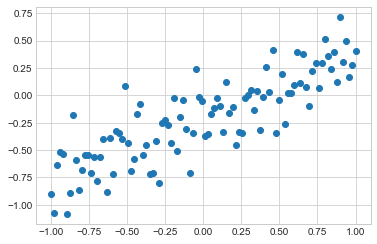

In [13]:
def generate_points_with_noise(size):
    pure = np.linspace(-1, 1, size)
    noise = np.random.normal(0, 0.2, size)
    return [[pure[p], -0.2 + 0.6 * pure[p] + noise[p]] for p in range(len(pure))]

Xy = list(zip(*generate_points_with_noise(100)))
plt.scatter(Xy[0], Xy[1])